# Hands on Machine Learning Chapter 2

## 라이브러리 불러오기

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


In [4]:
# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report

In [6]:
# 그림을 저장할 위치
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## csv 파일 불러오기

In [7]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 데이터 구조 

In [10]:
housing = load_housing_data()

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
print(housing.shape)

(20640, 10)


In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

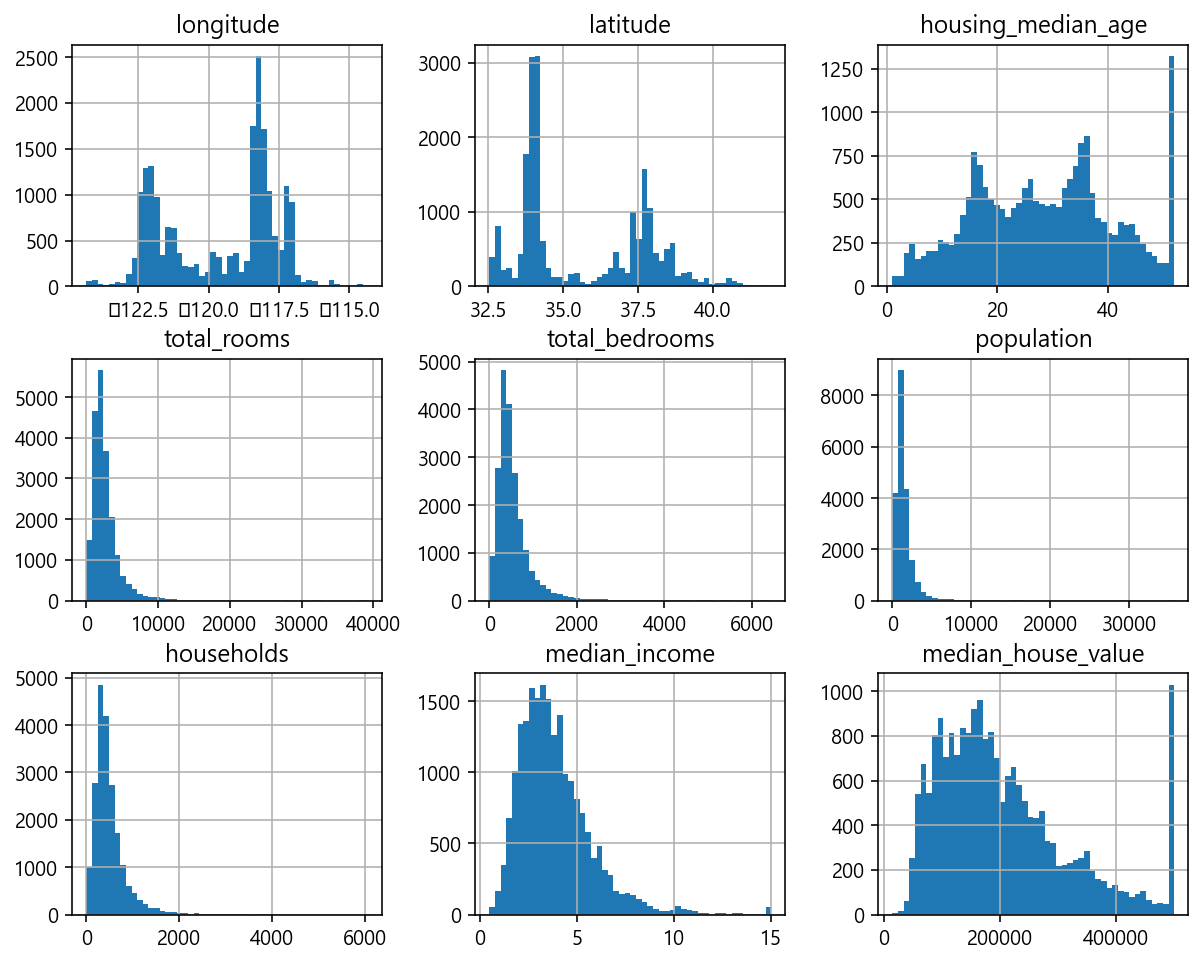

In [20]:
housing.hist(bins=50,figsize=(10,8))
plt.show

#### 테스트 데이터 셋 생성

In [23]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

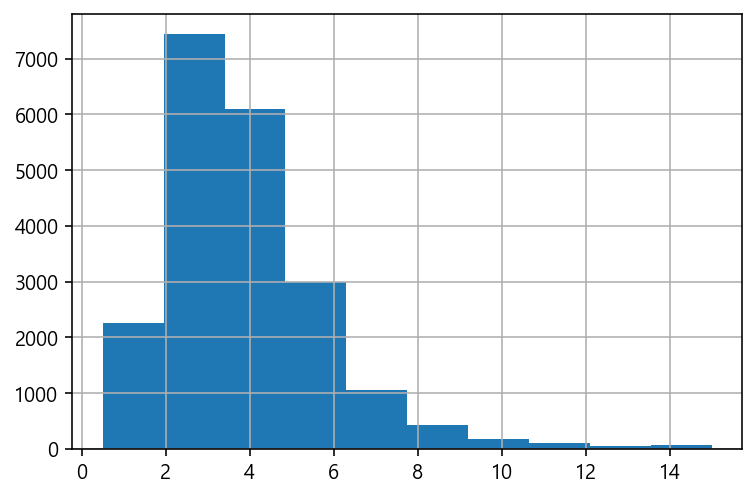

In [24]:
housing['median_income'].hist()

__데이터 계층적 샘플링__

In [25]:
#데이터의 카테고리(소득)별로 5개의 계층을 나눔
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.6,6.,np.inf],
                            labels=[1,2,3,4,5])

<AxesSubplot:>

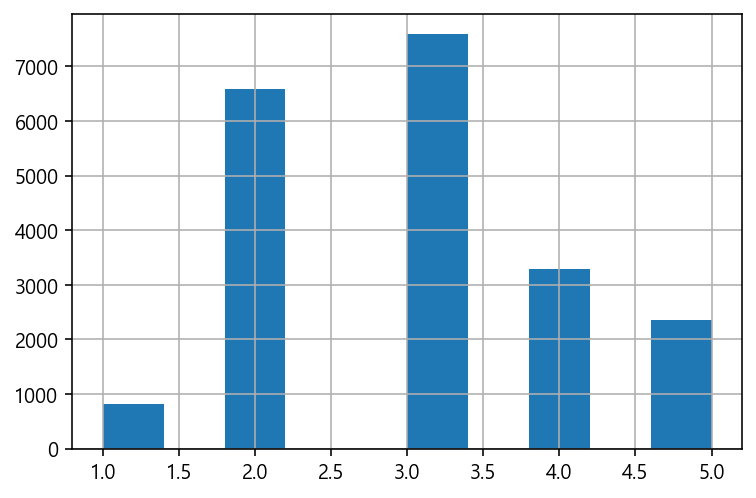

In [30]:
housing['income_cat'].hist()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [32]:
# 테스트 셋에서 소득 카테고리의 비율
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.367490
2    0.318798
4    0.159399
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [33]:
# 전체 데이터 셋에서 소득 카테고리의 비율
housing["income_cat"].value_counts() / len(housing)

3    0.367587
2    0.318847
4    0.159302
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [34]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [35]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.367587,0.367490,0.376453,2.412021,-0.026361
4,0.159302,0.159399,0.149467,-6.173966,0.060827
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [37]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 데이터 시각화

In [38]:
housing =strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

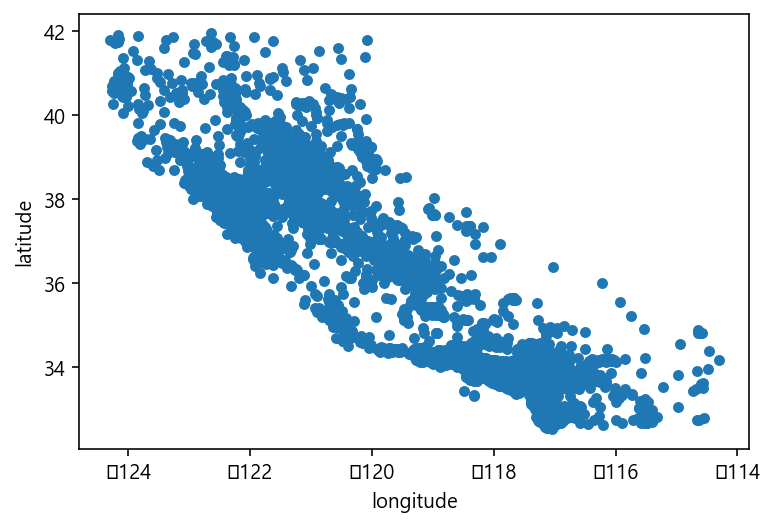

In [39]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

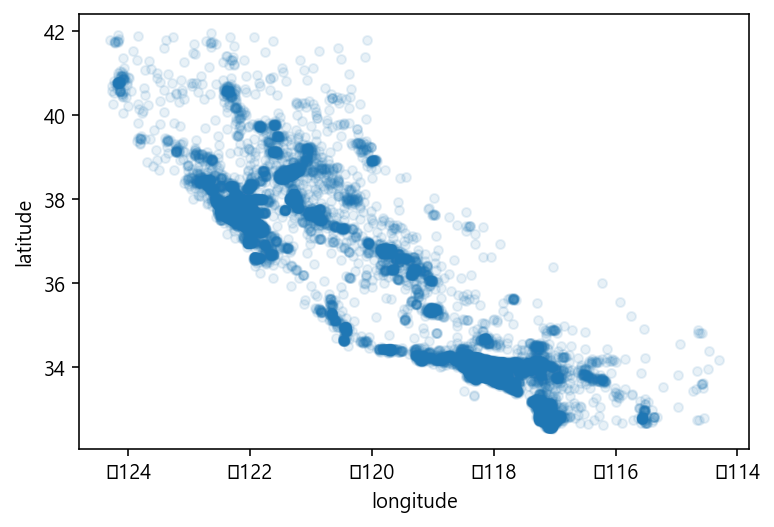

In [40]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

- 위도,경도에 따라 특정 지역군이 패턴을 가지고 있음

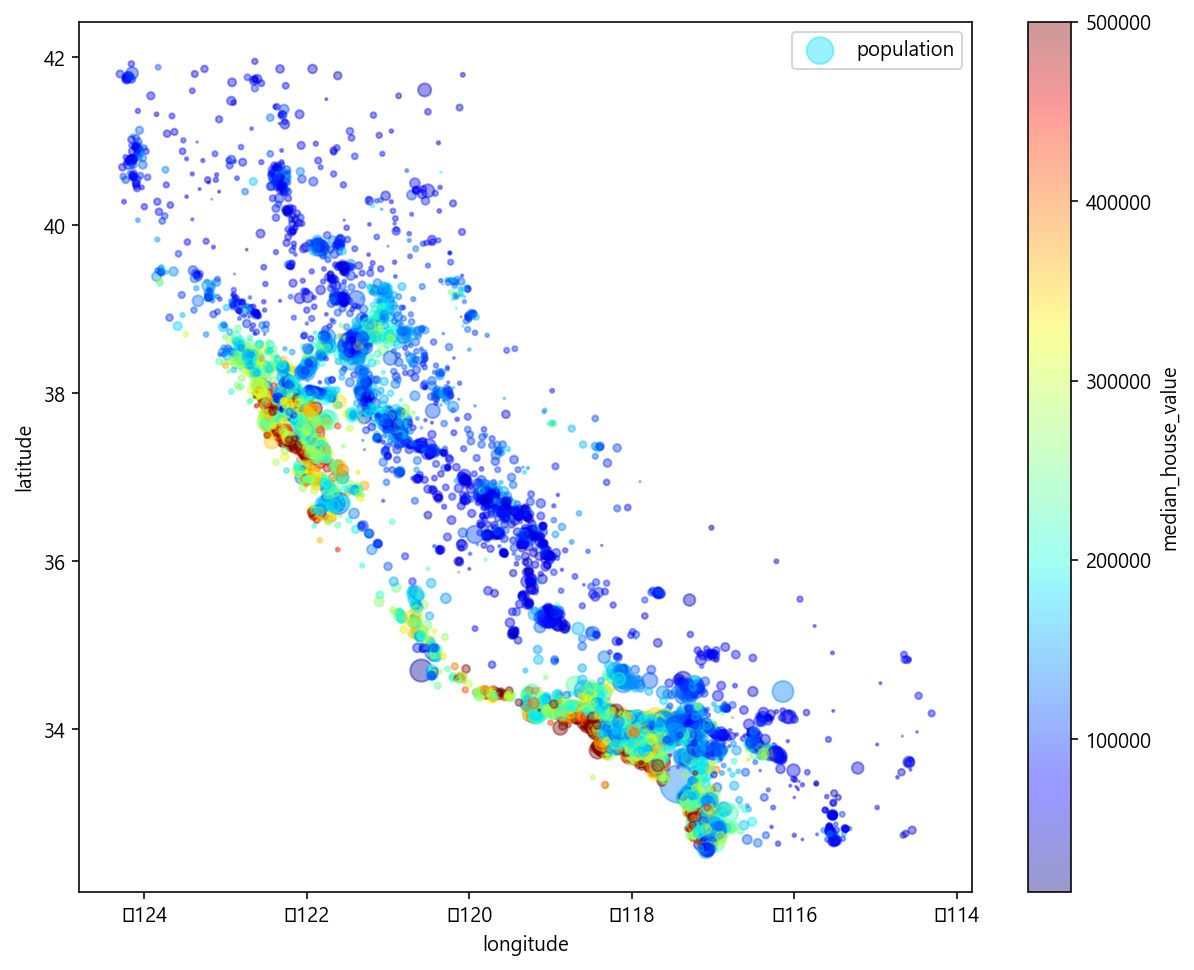

In [42]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,
            label='population',figsize=(10,8),c='median_house_value',cmap=plt.get_cmap("jet"),
            colorbar=True,sharex=False)
plt.legend()

In [62]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x2049ff643d0>)

그림 저장: california_housing_prices_plot


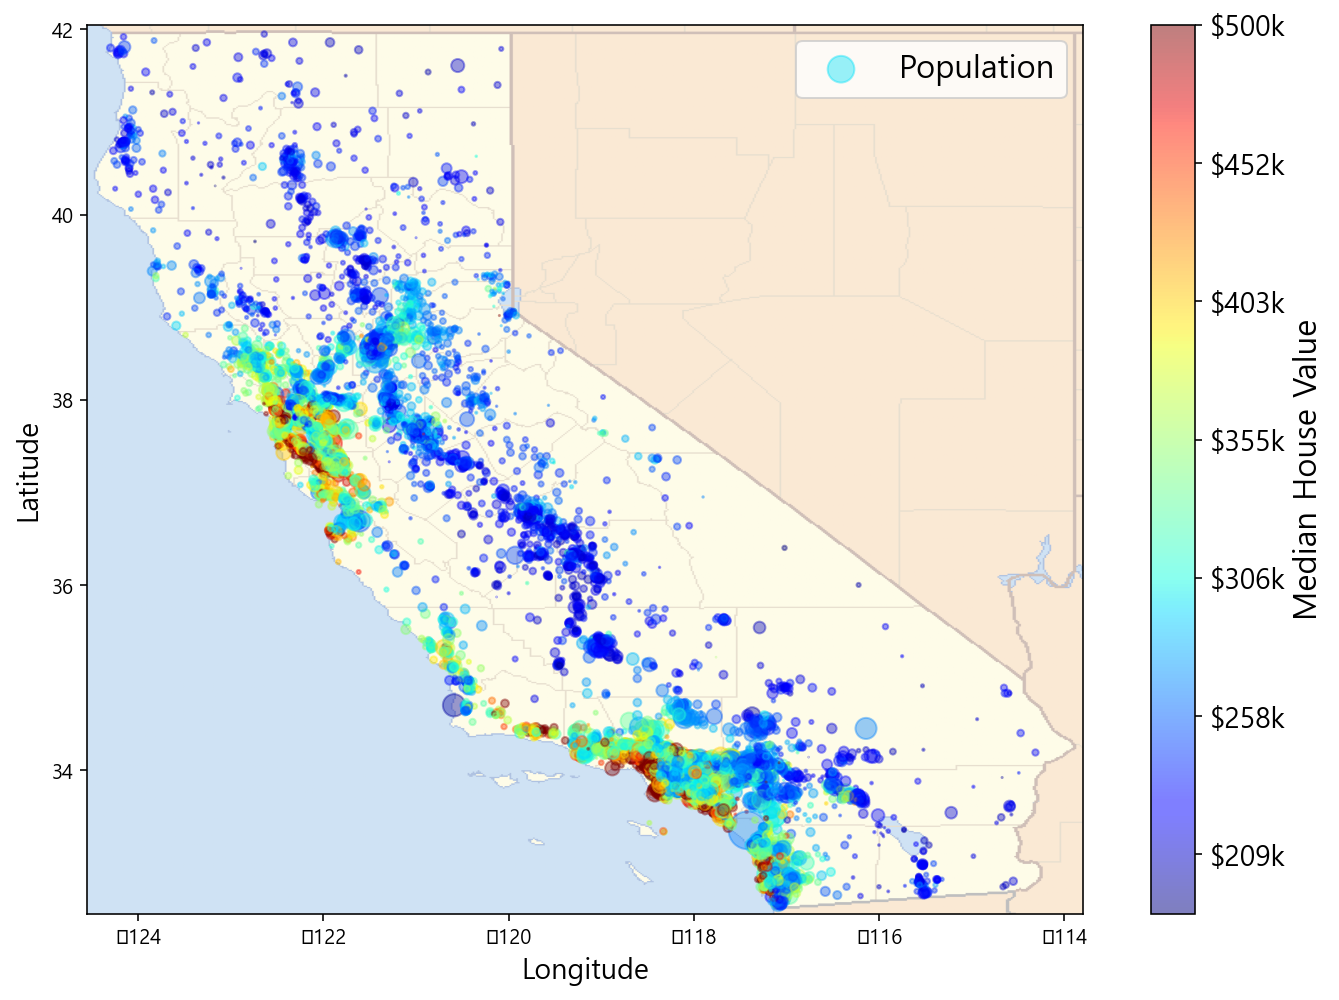

In [63]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

- 캘리포니아 주택 가격: 빨간색일수록 가격 ↑ 파란색일수록 ↓ 원이 클수록 인구가 밀집되어 있음



## 상관관계 조사

In [43]:
house_corr=housing.corr()

In [46]:
house_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690931
total_rooms           0.131721
housing_median_age    0.109157
households            0.062866
total_bedrooms        0.046003
population           -0.026658
longitude            -0.053456
latitude             -0.136914
Name: median_house_value, dtype: float64

In [47]:
house_corr['median_income'].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.690931
total_rooms           0.198522
households            0.013391
population            0.005530
total_bedrooms       -0.007016
longitude            -0.019868
latitude             -0.075634
housing_median_age   -0.112054
Name: median_income, dtype: float64

- median_house_value(중간 주택 가격은) median_income(중간 소득)이 올라갈수록 증가하는 경향을 보임

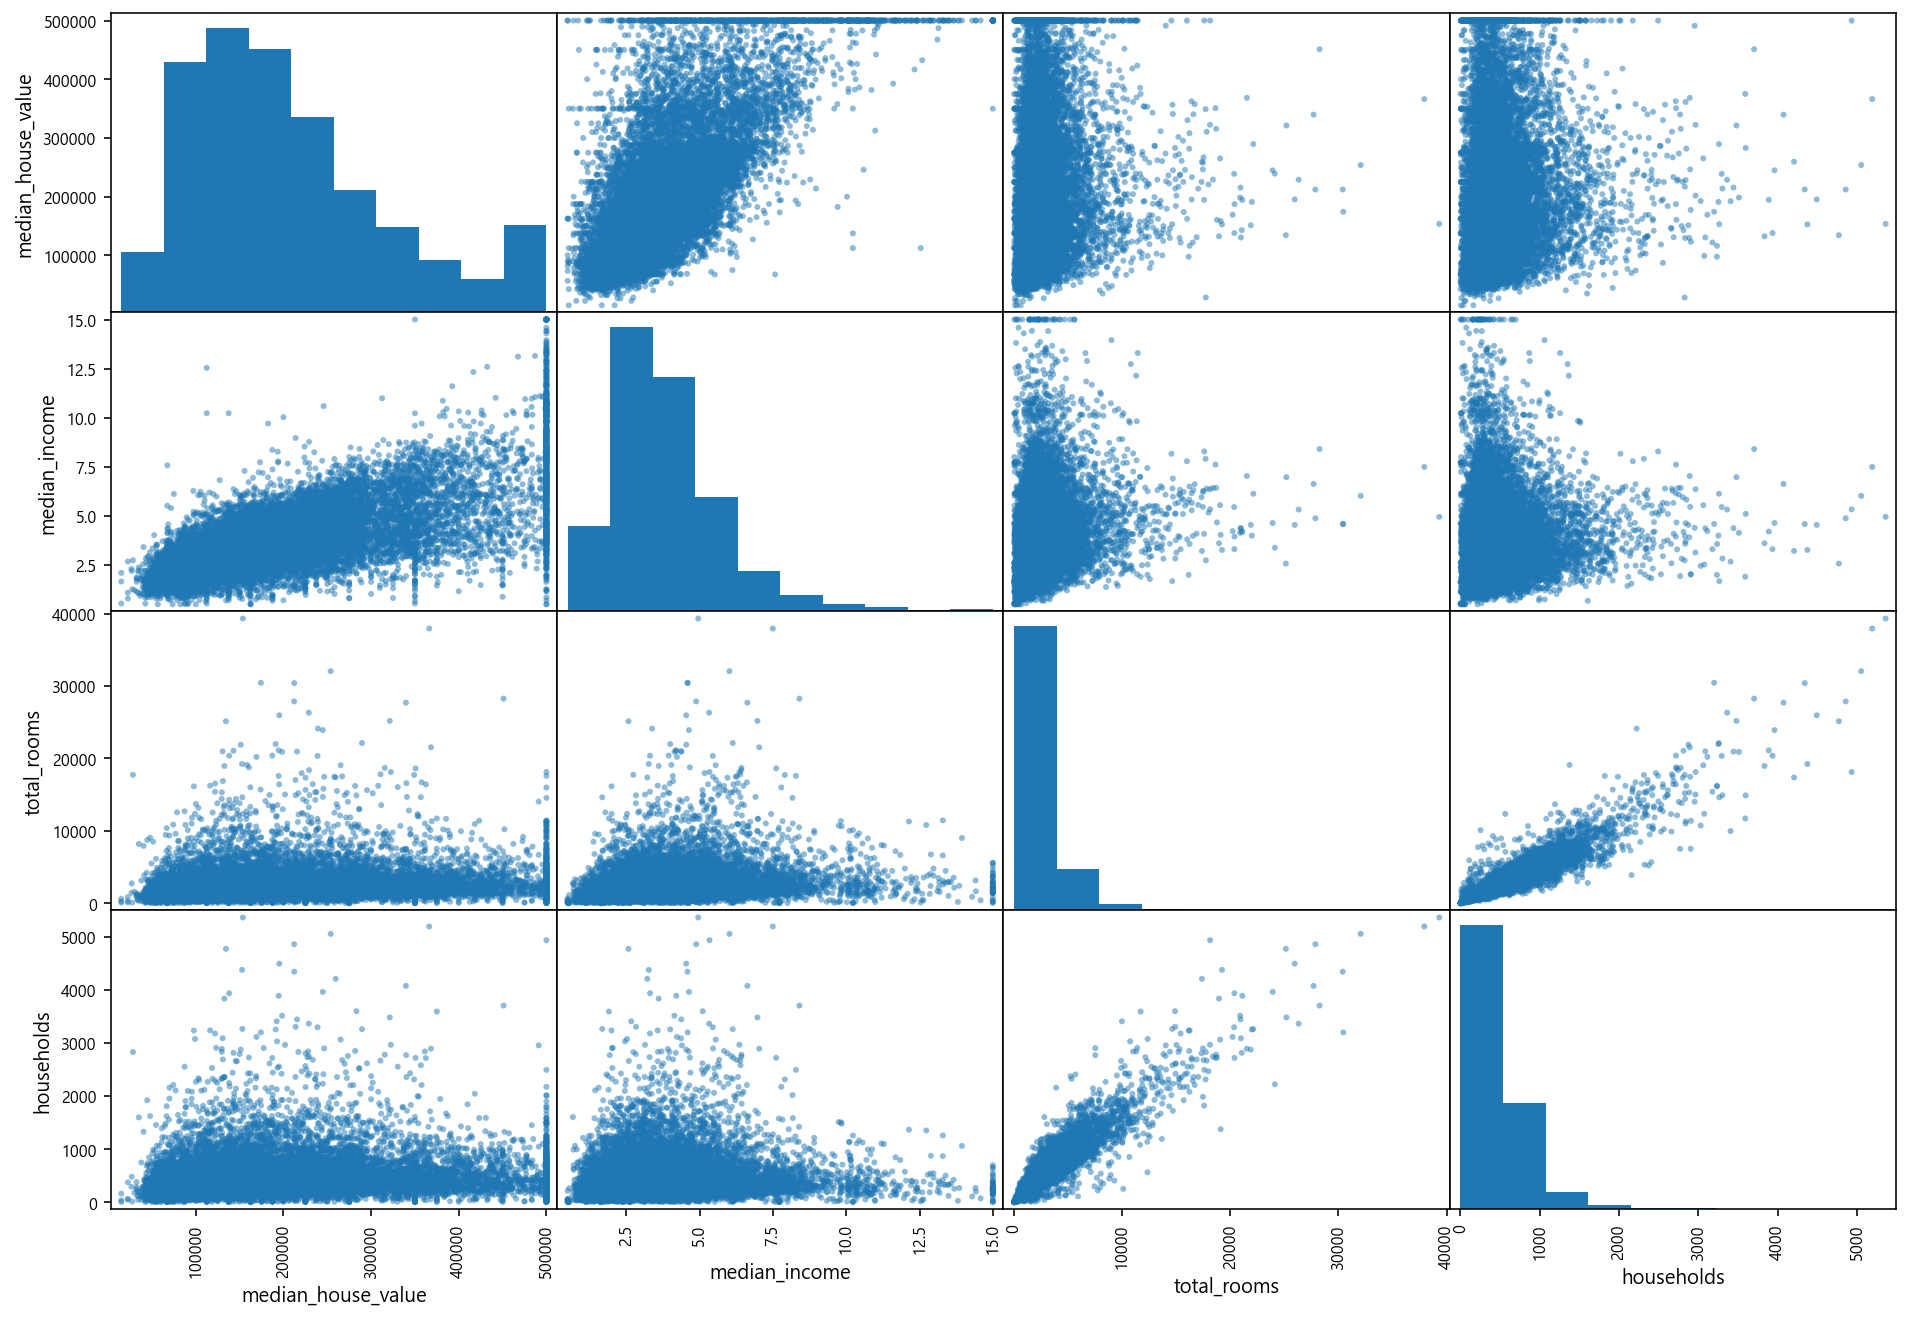

In [51]:
# 판다스의 산점도 함수로 상관관계 표현
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms',
             'households']
scatter_matrix(housing[attributes],figsize=(16,11))
plt.show()

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

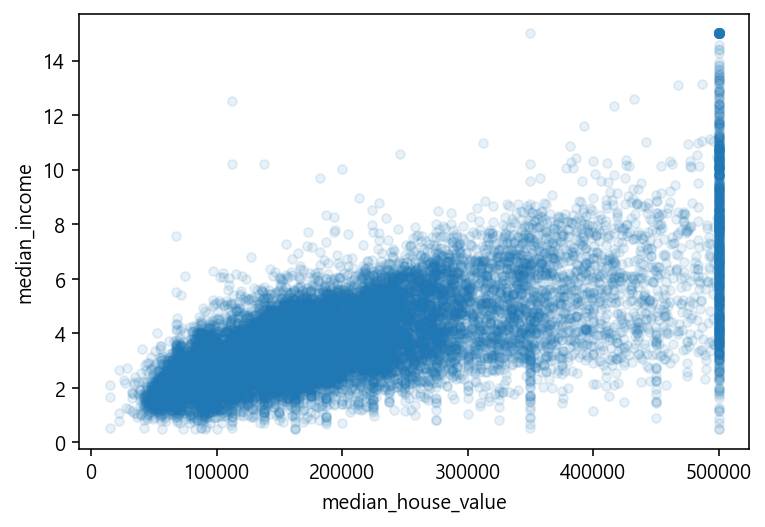

In [52]:
housing.plot(kind='scatter',x='median_house_value',y='median_income',alpha=0.1)

In [53]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20449,-118.88,34.28,22.0,3369.0,771.0,2751.0,710.0,4.0474,182100.0,<1H OCEAN


In [54]:
# 가구당 방 개수, 전체 방 개수 대비 침실  수, 가구당 인원수
housing['rooms_per_households']=housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_households']=housing['population']/housing['households']

In [55]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,bedrooms_per_rooms,population_per_households
20449,-118.88,34.28,22.0,3369.0,771.0,2751.0,710.0,4.0474,182100.0,<1H OCEAN,4.74507,0.228851,3.874648


In [56]:
house_corr=housing.corr()
house_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,bedrooms_per_rooms,population_per_households
longitude,1.000000,-0.924650,-0.111918,0.048428,0.076621,0.106264,0.062240,-0.019868,-0.053456,-0.029667,0.098781,-0.000249
latitude,-0.924650,1.000000,0.014185,-0.038443,-0.071470,-0.112997,-0.075577,-0.075634,-0.136914,0.106625,-0.118508,0.005392
housing_median_age,-0.111918,0.014185,1.000000,-0.362237,-0.326468,-0.299484,-0.308511,-0.112054,0.109157,-0.146549,0.132536,0.015553
total_rooms,0.048428,-0.038443,-0.362237,1.000000,0.931617,0.855837,0.919107,0.198522,0.131721,0.128264,-0.191343,-0.024810
total_bedrooms,0.076621,-0.071470,-0.326468,0.931617,1.000000,0.875618,0.979042,-0.007016,0.046003,0.002296,0.083165,-0.028430
population,0.106264,-0.112997,-0.299484,0.855837,0.875618,1.000000,0.906003,0.005530,-0.026658,-0.071046,0.034719,0.075184
households,0.062240,-0.075577,-0.308511,0.919107,0.979042,0.906003,1.000000,0.013391,0.062866,-0.078814,0.064129,-0.027612
median_income,-0.019868,-0.075634,-0.112054,0.198522,-0.007016,0.005530,0.013391,1.000000,0.690931,0.313965,-0.626965,0.021995
median_house_value,-0.053456,-0.136914,0.109157,0.131721,0.046003,-0.026658,0.062866,0.690931,1.000000,0.146786,-0.265794,-0.022046
rooms_per_households,-0.029667,0.106625,-0.146549,0.128264,0.002296,-0.071046,-0.078814,0.313965,0.146786,1.000000,-0.403133,-0.004862


In [58]:
house_corr['bedrooms_per_rooms'].sort_values(ascending=False)

bedrooms_per_rooms           1.000000
housing_median_age           0.132536
longitude                    0.098781
total_bedrooms               0.083165
households                   0.064129
population                   0.034719
population_per_households    0.004188
latitude                    -0.118508
total_rooms                 -0.191343
median_house_value          -0.265794
rooms_per_households        -0.403133
median_income               -0.626965
Name: bedrooms_per_rooms, dtype: float64

In [59]:
house_corr['rooms_per_households'].sort_values(ascending=False)

rooms_per_households         1.000000
median_income                0.313965
median_house_value           0.146786
total_rooms                  0.128264
latitude                     0.106625
total_bedrooms               0.002296
population_per_households   -0.004862
longitude                   -0.029667
population                  -0.071046
households                  -0.078814
housing_median_age          -0.146549
bedrooms_per_rooms          -0.403133
Name: rooms_per_households, dtype: float64

In [60]:
house_corr['population_per_households'].sort_values(ascending=False)

population_per_households    1.000000
population                   0.075184
median_income                0.021995
housing_median_age           0.015553
latitude                     0.005392
bedrooms_per_rooms           0.004188
longitude                   -0.000249
rooms_per_households        -0.004862
median_house_value          -0.022046
total_rooms                 -0.024810
households                  -0.027612
total_bedrooms              -0.028430
Name: population_per_households, dtype: float64

In [61]:
house_corr['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.690931
rooms_per_households         0.146786
total_rooms                  0.131721
housing_median_age           0.109157
households                   0.062866
total_bedrooms               0.046003
population_per_households   -0.022046
population                  -0.026658
longitude                   -0.053456
latitude                    -0.136914
bedrooms_per_rooms          -0.265794
Name: median_house_value, dtype: float64